In [1]:
import sys
import pandas as pd
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [118]:
df = pd.read_csv("../data/breast-cancer.csv")

In [119]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [120]:
df.shape

(569, 33)

In [121]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [122]:
print('Maligni: {}%\nBenigni: {}%'.format(357/569, 212/569))

Maligni: 0.6274165202108963%
Benigni: 0.37258347978910367%


In [123]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [124]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])

In [125]:
df.drop(columns='Unnamed: 32', inplace=True)

In [126]:
df.shape

(569, 32)

# Mapper algoritam 2 dim


In [87]:
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

In [88]:
mapper = km.KeplerMapper(verbose=2)
lens2 = mapper.fit_transform(X, projection="l2norm")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (569, 3)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [89]:
lens = np.c_[lens1, lens2]

In [90]:
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=10, perc_overlap=0.2),
                   clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                    random_state=1618033))

Mapping on data shaped (569, 3) using lens shaped (569, 2)

Minimal points in hypercube before clustering: 2
Creating 100 hypercubes.
   > Found 2 clusters.

   > Found 2 clusters.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

   > Found 2 clusters.

Cube_6 is empty.

Cube_7 is empty.

   > Found 2 clusters.

Cube_9 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_12 is empty.

Cube_13 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_18 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > 

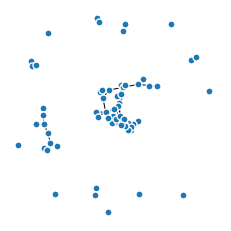

In [91]:
import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.savefig('mapper2-cancer.png')
plt.show()

# TSNE 2 dimenzije (samo radi poredjenja rezultata)

In [22]:
from sklearn.manifold import TSNE

In [23]:
mdl = TSNE(perplexity=35, n_iter=10000)
X_transformed = mdl.fit_transform(X)
print(X_transformed)

[[-34.274227     0.81170076]
 [-35.018223     3.0485985 ]
 [-31.530603     5.3935843 ]
 ...
 [-17.389957    13.831031  ]
 [-33.35178      4.0466914 ]
 [ 10.698551   -36.912056  ]]


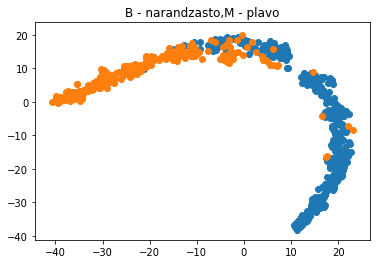

In [24]:
plt.title('B - narandzasto,M - plavo')
for i in range(2):
    plt.scatter(X_transformed[df['diagnosis'] == i, 0], X_transformed[df['diagnosis'] == i, 1])
plt.savefig('tsne2.png')

# TSNE 3 dimenzije 

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [26]:
mdl = TSNE(n_components=3,perplexity=35, n_iter=5000)
X_transformed = mdl.fit_transform(X)
print(X_transformed)
X_transformed.shape

[[-12.673112    -0.3215765   -4.300755  ]
 [-11.732781    -0.90470284  -2.7484748 ]
 [-10.186481     1.2255447   -2.7581556 ]
 ...
 [ -3.8807392    7.9259934   -1.5770974 ]
 [-10.991691     0.06780402  -2.7853248 ]
 [ -9.960745   -12.12374      5.069721  ]]


(569, 3)

/home/nina/.local/lib/python3.6/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


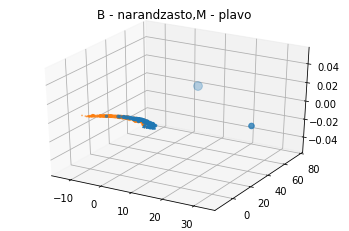

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('B - narandzasto,M - plavo')
for i in range(2):
    plt.scatter(X_transformed[df['diagnosis'] == i, 0], X_transformed[df['diagnosis'] == i, 1], X_transformed[df['diagnosis'] == i, 1] )
plt.savefig("tsne3.png")
plt.show()

# Autoencoder 2 dimenzije

In [29]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [30]:
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [31]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [127]:
df = pd.read_csv('../data/breast-cancer.csv')

In [128]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

In [ ]:
df.drop(columns='Unnamed: 32', inplace=True)

# sigmoidna aktivaciona funkcija

/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


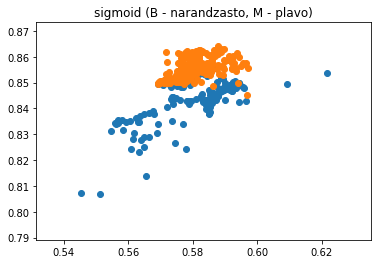

In [165]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])
input_dim = X.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(200, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(100, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2']
joined = encoded_data.join(df["diagnosis"])
x1 = joined[joined['diagnosis'] == 1]
x0 = joined[joined['diagnosis'] == 0]
plt.title('sigmoid (B - narandzasto, M - plavo)')
plt.scatter(x1['factor_1'], x1['factor_2'])
plt.scatter(x0['factor_1'], x0['factor_2'])
plt.savefig('auto2_sigmoid_naslov.png')

# relu aktivaciona funkcija

/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


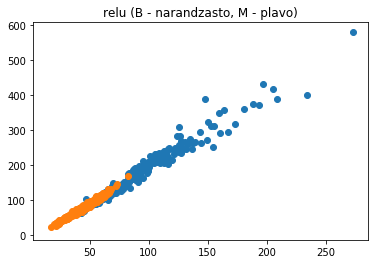

In [153]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])
input_dim = X.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(200, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(100, activation="relu")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="relu")(encoder_layer_2)
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2']
joined = encoded_data.join(df["diagnosis"])
x1 = joined[joined['diagnosis'] == 1]
x0 = joined[joined['diagnosis'] == 0]
plt.title('relu (B - narandzasto, M - plavo)')
plt.scatter(x1['factor_1'], x1['factor_2'])
plt.scatter(x0['factor_1'], x0['factor_2'])
plt.savefig('auto2_relu_naslov.png')

# Hiperbolicki tangens

/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


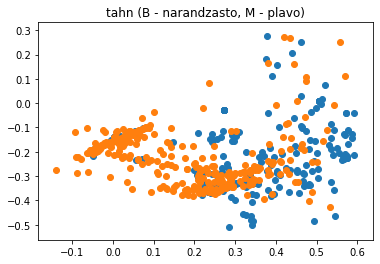

In [152]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])
input_dim = X.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(200, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(100, activation="tanh")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="tanh")(encoder_layer_2)
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2']
joined = encoded_data.join(df["diagnosis"])
x1 = joined[joined['diagnosis'] == 1]
x0 = joined[joined['diagnosis'] == 0]
plt.title('tahn (B - narandzasto, M - plavo)')
plt.scatter(x1['factor_1'], x1['factor_2'])
plt.scatter(x0['factor_1'], x0['factor_2'])
plt.savefig('auto2_tahn.png')

# SOM 2 dimenzije

In [115]:
import matplotlib.pyplot as plt
from minisom import MiniSom

som = MiniSom(6, 6, 32, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
som.train_random(df.values, 400)

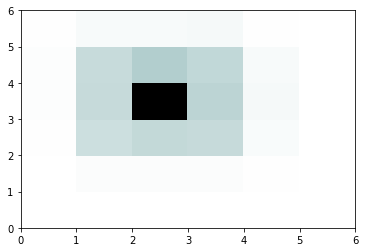

In [116]:
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.savefig('som_cancer.png')

# Autoencoder 3 dimenzije

In [166]:
df = pd.read_csv("../data/breast-cancer.csv")

In [167]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))
y = np.array(df["diagnosis"])

In [168]:
df.drop(columns='Unnamed: 32', inplace=True)

In [169]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [170]:
input_dim = X.shape[1]
input_dim

31

In [171]:
encoding_dim = 3

In [172]:
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(100, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(50, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)

In [173]:
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)

In [174]:
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2', 'factor_3']

In [175]:
joined = encoded_data.join(df["diagnosis"])

In [176]:
x1 = joined[joined['diagnosis'] == 1]
x0 = joined[joined['diagnosis'] == 0]

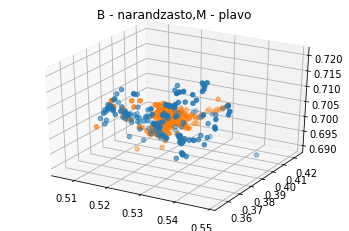

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('B - narandzasto,M - plavo')
ax.scatter(x1['factor_1'],x1['factor_2'],x1['factor_3'])
ax.scatter(x0['factor_1'],x0['factor_2'],x0['factor_3'])
plt.savefig("auto3_sigmoid.png")
plt.show()